In [186]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#build model file
import joblib

# Ignore warnings
import warnings

warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [187]:
df = pd.read_csv("ecommerce_sales_data (2).csv")

In [188]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [190]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [191]:
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [192]:
#drop order date
df.drop("Order Date", axis=1, inplace=True)

In [193]:
nums_col = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [194]:
correlation = df[nums_col].corr()
correlation

,Quantity,Sales,Profit
Quantity,1.000000,0.662468,0.560651
Sales,0.662468,1.000000,0.832826
Profit,0.560651,0.832826,1.000000


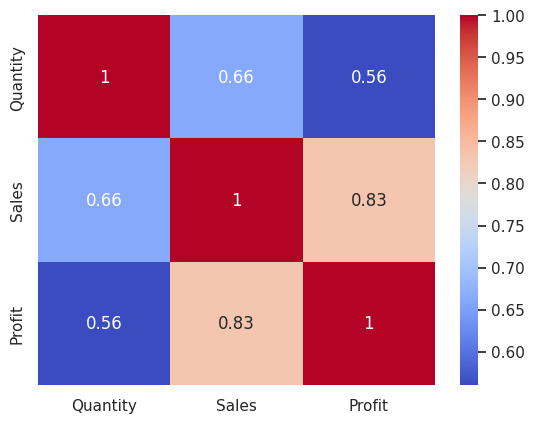

In [195]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

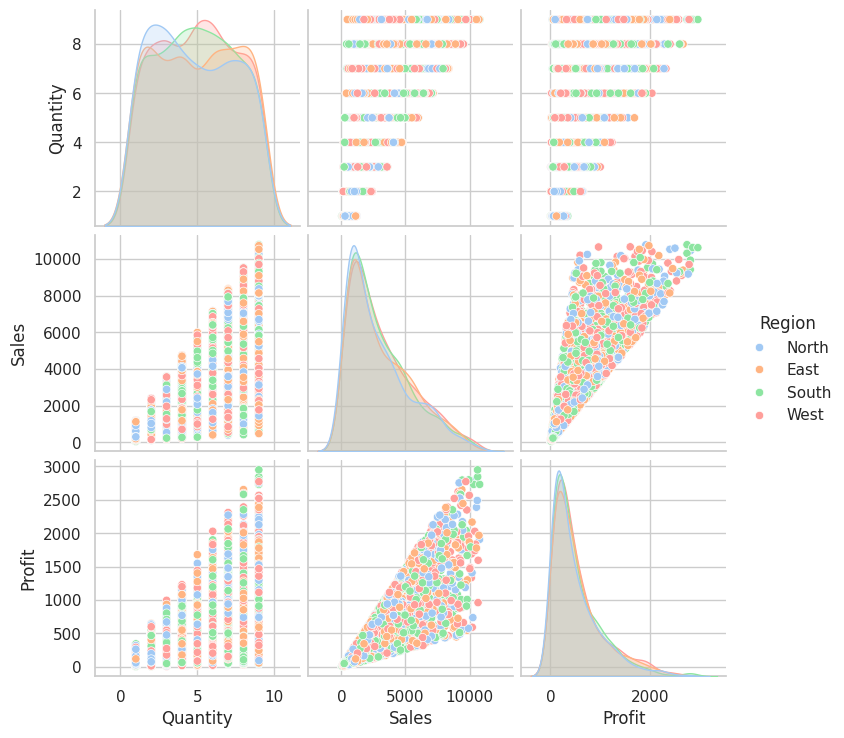

In [196]:
#EDA
sns.pairplot(df, hue="Region")
plt.show()

In [197]:
#unique per cat cols
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Product Name: ['Printer' 'Mouse' 'Tablet' 'Camera' 'Headphones' 'Smartwatch' 'Monitor'
 'Smartphone' 'Keyboard' 'Laptop']
Category: ['Office' 'Accessories' 'Electronics']
Region: ['North' 'East' 'South' 'West']


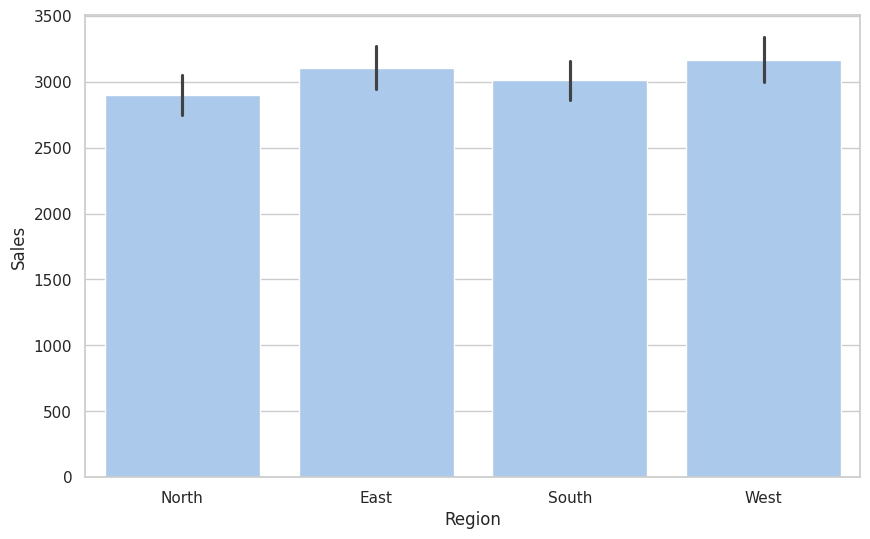

In [198]:
#sales per region visulization
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Sales", data=df)
plt.show()

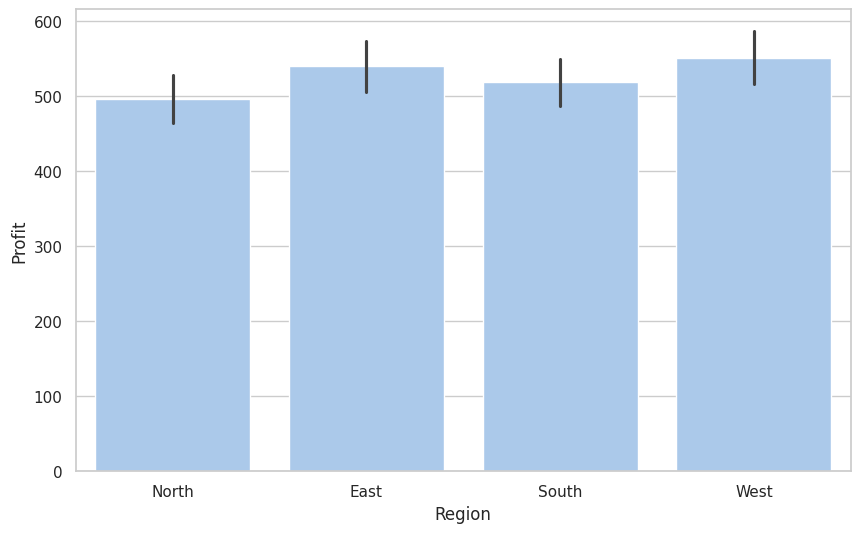

In [199]:
#profit per region
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Profit", data=df)
plt.show()

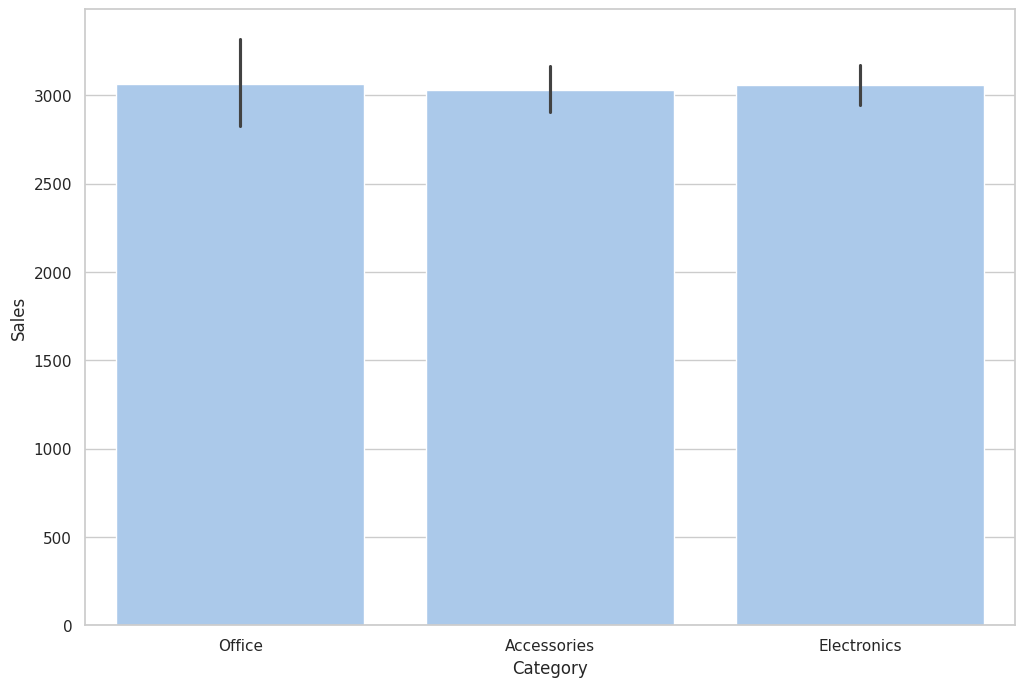

In [200]:
#sales per category
plt.figure(figsize=(12,8))
sns.barplot(x="Category", y="Sales", data=df)
plt.show()

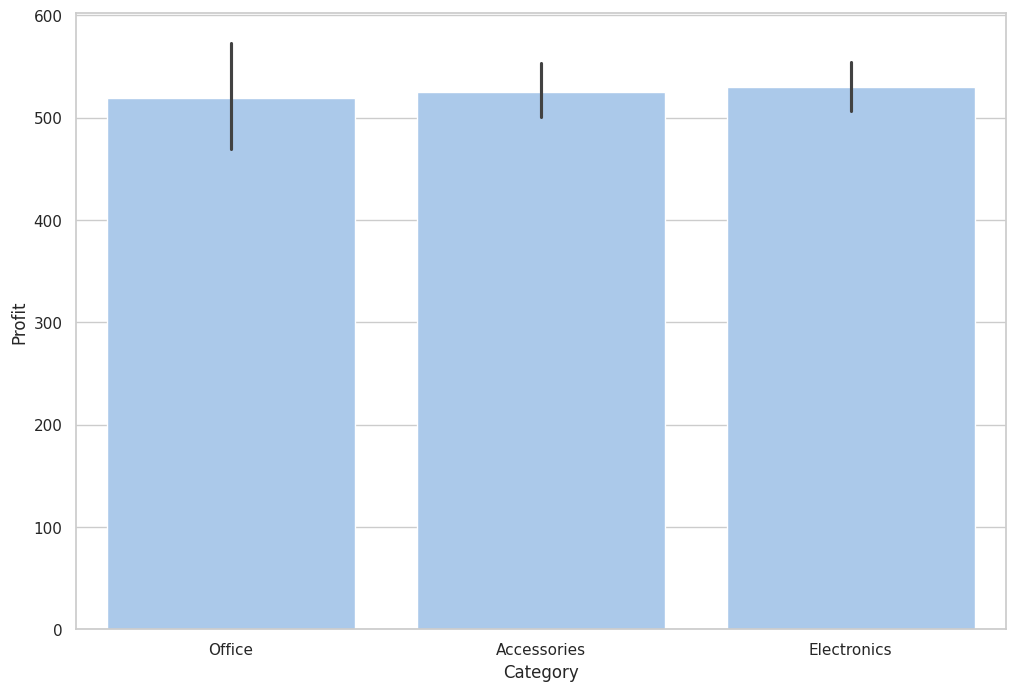

In [201]:
#profit per category
plt.figure(figsize=(12,8))
sns.barplot(x="Category", y="Profit", data=df)
plt.show()

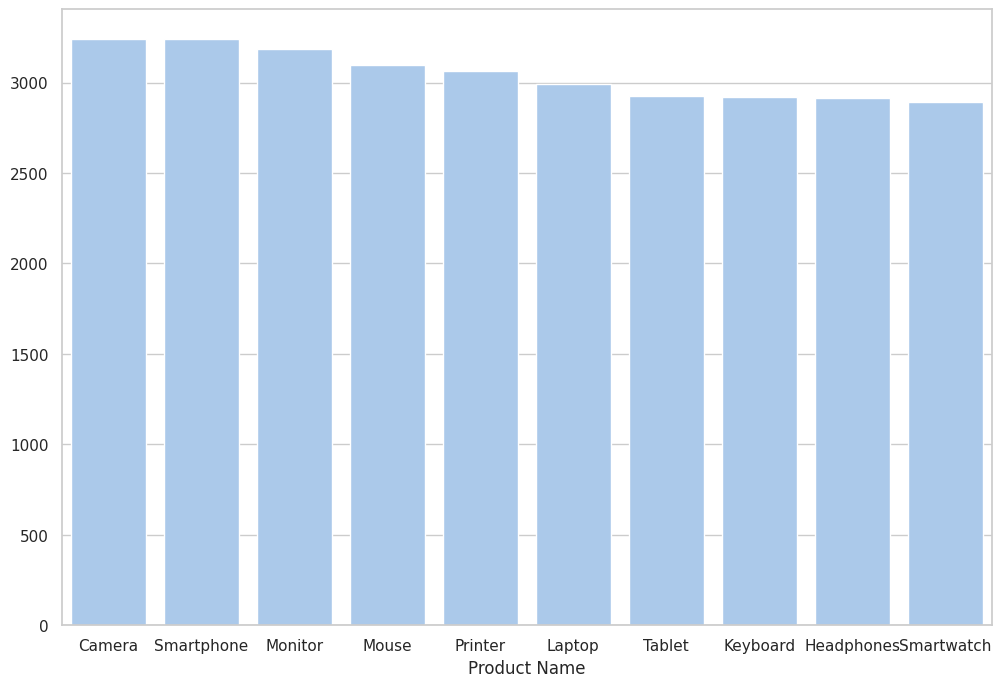

In [202]:
#average price per product
avg_per_product = df.groupby("Product Name")["Sales"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=avg_per_product.index, y=avg_per_product.values)
plt.show()

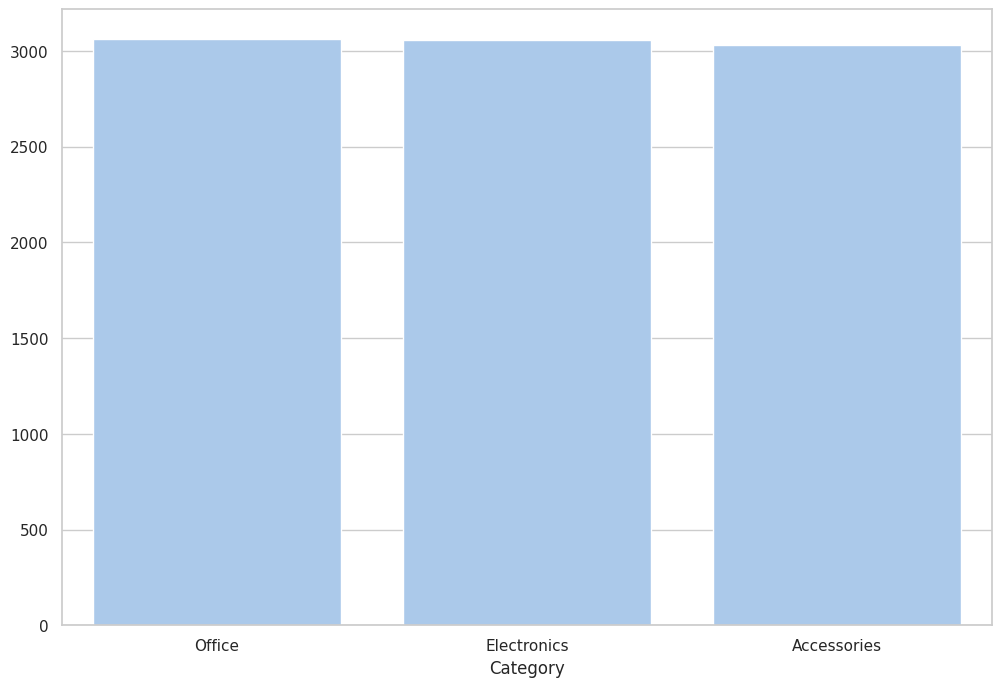

In [203]:
#average price per category
avg_per_category = df.groupby("Category")["Sales"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=avg_per_category.index, y=avg_per_category.values)
plt.show()

In [204]:
#lable encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [206]:
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [208]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [209]:
#liner reg model
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [210]:
linRegPred = linReg.predict(X_test_scaled)

In [211]:
#model eval
print(f"MAE: {mean_absolute_error(y_test,linRegPred)}")
print(f"MSE: {mean_squared_error(y_test,linRegPred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,linRegPred))}")
print(f"R2 Score: {r2_score(y_test,linRegPred)}")

MAE: 199.95827364080685
MSE: 87951.7801600301
RMSE: 296.56665382343664
R2 Score: 0.6528391691849308
